# Rozpoznawanie obrazów
Projekt został wykonany na zajęciach Rozpoznawanie Obrazów na 4 semestrze studiów na kierunku Inżynieria Systemów na Politechnice Wrocławskiej. Zajęcia prowadził dr inż. Maciej Zięba. Prowadzący zapewnił dane.

### Cel projektu
Celem projektu jest porównanie różnych metod uczenia maszynowego w rozpoznawaniu obrazów

### Opis
Dane zawierają 60000 obrazów ukazujązych różne części garderoby. Każdy obraz jest rozmiaru 36x36 pikseli. Obrazy są podzielone na 10 klas. Dla utrudnienia zadania prowadzący dodał szum i wykonał drobne przesunięcia obiektów, któe znajdują się na zdjęciach.<br/>

W projekcie zostaną zaimplementowane dwie metody uczenia maszynowego od początku:
- Logistic Regression 
- K-Nearest Neighbors

Oraz trzy metody przy użyciu biblioteki scikit-learn:
- Multilayer Perceptron
- Decision Tree
- Naive Bayes

#### Import potrzebnych bibliotek

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

### Załadowanie oraz wyświetlenie potrzebnych danych

In [94]:
path = open("data.pkl","rb")
data = pkl.load(path)

print("Ilość obrazów: " + str(len(data[0])))
print()
print("Przykładowe dane: ")
print(data[0][:2])
print()
print("Przykładowe etykiety")
print(data[1][:2])

Ilość obrazów: 60000

Przykładowe dane: 
[[0.08759263 0.44399702 0.11604331 ... 0.13489278 0.02033333 0.09685737]
 [0.18683595 0.047415   0.31967908 ... 0.18845089 0.38688332 0.04445307]]

Przykładowe etykiety
[7 7]


### Wyświetlenie przykładowych obrazów

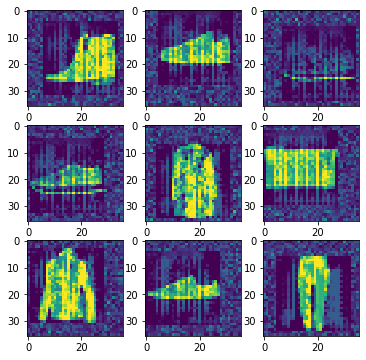

In [95]:
rows = 3
columns = 3

pictures = []
for i in range(rows*columns):
    pictures.append(data[0][i].reshape(36,36))

fig = plt.figure(figsize=(6,6))
for i in range(1,rows*columns+1):
    image = pictures[i-1]
    fig.add_subplot(rows,columns,i)
    plt.imshow(image)
plt.show()

### Podział danych na zbiór treningowy i testowy

In [97]:
train_size = 0.8

x_train = data[0][:int(len(data[0])*train_size)]
y_train = data[1][:int(len(data[1])*train_size)]

x_test = data[0][int(len(data[0])*train_size):]
y_test = data[1][int(len(data[1])*train_size):]

# Logistic Regression
Program korzysta z softmax (potrzebne do wieloklasowej regresji logistycznej) oraz z regularyzacji

In [66]:
def change(Y):
    '''Funkcja przyjmuje listę cyfr ze zbioru 0,..,9 i zwraca listę 
    zawierającą listy 10 elementowe które mają 1 na miejscu odpowiadającej 
    im cyfry i zera na pozostałych miejscach'''
    
    y_len = Y.shape[0]
    y = []

    for i in range(y_len):
        if Y[i] == 0:
            y.append([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        elif Y[i] == 1:
            y.append([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
        elif Y[i] == 2:
            y.append([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
        elif Y[i] == 3:
            y.append([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
        elif Y[i] == 4:
            y.append([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
        elif Y[i] == 5:
            y.append([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
        elif Y[i] == 6:
            y.append([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
        elif Y[i] == 7:
            y.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
        elif Y[i] == 8:
            y.append([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
        elif Y[i] == 9:
            y.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

    return y


def softmax(z):
    '''Funkcja zwraca prawdopodobieństwa
    przynależności do danej klasy'''
    
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    
    return sm


def Loss(w,x,y,lam):
    '''Funkcja straty'''

    m = x.shape[0] #liczba przykładów
    y_ch = change(y) #zmnień cyfry na liste
    scores = np.dot(x,w) #Przemnaża wagi i x  (rozmiar y,10)
    prob = softmax(scores) #Liczy prawdopodobieństwa dla 10 klas    (rozmiar y,10)
    loss = (-1 / m) * np.sum(y_ch * np.log(prob)) + (lam/2)*np.sum(w*w) #Funkcja straty z regularyzacją
    grad = (-1 / m) * np.dot(x.T,(y_ch - prob)) + lam*w #Gradient funkcji straty  (1296,10)

    return loss,grad


def prediction(x):
    '''Funkcja zwracająca prognozowaną klasę'''

    prob = softmax(np.dot(x, w))
    pred = np.argmax(prob, axis=1)
    
    return pred


def success(y_pred, y_test):
    '''Funkcja licząca trafność prognozowanych klas'''

    accuracy = sum(y_pred == y_test)/(len(y_test)) * 100

    return round(accuracy,2)


### Ustawienie parametrów i uczenie modelu

In [74]:
lam = 0.01 #Parametr regularyzacji
iterations = 1000 #Liczba iteracji
learningRate = 0.12

# ustanowienie początkowych wag
w = np.zeros([x_train.shape[1],len(np.unique(y_train))])

l = []


for i in range(iterations):
    loss, grad = Loss(w, x_train, y_train, lam)
    w = w - (learningRate * grad)
    print("Iteracja: "+ str(i+1))
    print("Wartość funkcji straty: "+str(round(loss,2)))
    l.append(loss)

Iteracja: 1
Wartość funkcji straty: 2.3
Iteracja: 2
Wartość funkcji straty: 2.21
Iteracja: 3
Wartość funkcji straty: 2.14
Iteracja: 4
Wartość funkcji straty: 2.08
Iteracja: 5
Wartość funkcji straty: 2.03
Iteracja: 6
Wartość funkcji straty: 1.98
Iteracja: 7
Wartość funkcji straty: 1.94
Iteracja: 8
Wartość funkcji straty: 1.9
Iteracja: 9
Wartość funkcji straty: 1.87
Iteracja: 10
Wartość funkcji straty: 1.83
Iteracja: 11
Wartość funkcji straty: 1.8
Iteracja: 12
Wartość funkcji straty: 1.78
Iteracja: 13
Wartość funkcji straty: 1.75
Iteracja: 14
Wartość funkcji straty: 1.73
Iteracja: 15
Wartość funkcji straty: 1.7
Iteracja: 16
Wartość funkcji straty: 1.68
Iteracja: 17
Wartość funkcji straty: 1.66
Iteracja: 18
Wartość funkcji straty: 1.64
Iteracja: 19
Wartość funkcji straty: 1.63
Iteracja: 20
Wartość funkcji straty: 1.61
Iteracja: 21
Wartość funkcji straty: 1.59
Iteracja: 22
Wartość funkcji straty: 1.58
Iteracja: 23
Wartość funkcji straty: 1.57
Iteracja: 24
Wartość funkcji straty: 1.55
Itera

Iteracja: 195
Wartość funkcji straty: 1.12
Iteracja: 196
Wartość funkcji straty: 1.12
Iteracja: 197
Wartość funkcji straty: 1.12
Iteracja: 198
Wartość funkcji straty: 1.12
Iteracja: 199
Wartość funkcji straty: 1.12
Iteracja: 200
Wartość funkcji straty: 1.12
Iteracja: 201
Wartość funkcji straty: 1.12
Iteracja: 202
Wartość funkcji straty: 1.12
Iteracja: 203
Wartość funkcji straty: 1.12
Iteracja: 204
Wartość funkcji straty: 1.12
Iteracja: 205
Wartość funkcji straty: 1.12
Iteracja: 206
Wartość funkcji straty: 1.12
Iteracja: 207
Wartość funkcji straty: 1.12
Iteracja: 208
Wartość funkcji straty: 1.12
Iteracja: 209
Wartość funkcji straty: 1.12
Iteracja: 210
Wartość funkcji straty: 1.11
Iteracja: 211
Wartość funkcji straty: 1.11
Iteracja: 212
Wartość funkcji straty: 1.11
Iteracja: 213
Wartość funkcji straty: 1.11
Iteracja: 214
Wartość funkcji straty: 1.11
Iteracja: 215
Wartość funkcji straty: 1.11
Iteracja: 216
Wartość funkcji straty: 1.11
Iteracja: 217
Wartość funkcji straty: 1.11
Iteracja: 2

Iteracja: 387
Wartość funkcji straty: 1.08
Iteracja: 388
Wartość funkcji straty: 1.08
Iteracja: 389
Wartość funkcji straty: 1.08
Iteracja: 390
Wartość funkcji straty: 1.08
Iteracja: 391
Wartość funkcji straty: 1.08
Iteracja: 392
Wartość funkcji straty: 1.08
Iteracja: 393
Wartość funkcji straty: 1.08
Iteracja: 394
Wartość funkcji straty: 1.08
Iteracja: 395
Wartość funkcji straty: 1.08
Iteracja: 396
Wartość funkcji straty: 1.08
Iteracja: 397
Wartość funkcji straty: 1.08
Iteracja: 398
Wartość funkcji straty: 1.08
Iteracja: 399
Wartość funkcji straty: 1.08
Iteracja: 400
Wartość funkcji straty: 1.08
Iteracja: 401
Wartość funkcji straty: 1.08
Iteracja: 402
Wartość funkcji straty: 1.08
Iteracja: 403
Wartość funkcji straty: 1.08
Iteracja: 404
Wartość funkcji straty: 1.08
Iteracja: 405
Wartość funkcji straty: 1.08
Iteracja: 406
Wartość funkcji straty: 1.08
Iteracja: 407
Wartość funkcji straty: 1.08
Iteracja: 408
Wartość funkcji straty: 1.08
Iteracja: 409
Wartość funkcji straty: 1.08
Iteracja: 4

Iteracja: 578
Wartość funkcji straty: 1.07
Iteracja: 579
Wartość funkcji straty: 1.07
Iteracja: 580
Wartość funkcji straty: 1.07
Iteracja: 581
Wartość funkcji straty: 1.07
Iteracja: 582
Wartość funkcji straty: 1.07
Iteracja: 583
Wartość funkcji straty: 1.07
Iteracja: 584
Wartość funkcji straty: 1.07
Iteracja: 585
Wartość funkcji straty: 1.07
Iteracja: 586
Wartość funkcji straty: 1.07
Iteracja: 587
Wartość funkcji straty: 1.07
Iteracja: 588
Wartość funkcji straty: 1.07
Iteracja: 589
Wartość funkcji straty: 1.07
Iteracja: 590
Wartość funkcji straty: 1.07
Iteracja: 591
Wartość funkcji straty: 1.07
Iteracja: 592
Wartość funkcji straty: 1.07
Iteracja: 593
Wartość funkcji straty: 1.07
Iteracja: 594
Wartość funkcji straty: 1.07
Iteracja: 595
Wartość funkcji straty: 1.07
Iteracja: 596
Wartość funkcji straty: 1.07
Iteracja: 597
Wartość funkcji straty: 1.07
Iteracja: 598
Wartość funkcji straty: 1.07
Iteracja: 599
Wartość funkcji straty: 1.07
Iteracja: 600
Wartość funkcji straty: 1.07
Iteracja: 6

Iteracja: 769
Wartość funkcji straty: 1.07
Iteracja: 770
Wartość funkcji straty: 1.07
Iteracja: 771
Wartość funkcji straty: 1.07
Iteracja: 772
Wartość funkcji straty: 1.07
Iteracja: 773
Wartość funkcji straty: 1.07
Iteracja: 774
Wartość funkcji straty: 1.07
Iteracja: 775
Wartość funkcji straty: 1.07
Iteracja: 776
Wartość funkcji straty: 1.07
Iteracja: 777
Wartość funkcji straty: 1.07
Iteracja: 778
Wartość funkcji straty: 1.07
Iteracja: 779
Wartość funkcji straty: 1.07
Iteracja: 780
Wartość funkcji straty: 1.07
Iteracja: 781
Wartość funkcji straty: 1.07
Iteracja: 782
Wartość funkcji straty: 1.07
Iteracja: 783
Wartość funkcji straty: 1.07
Iteracja: 784
Wartość funkcji straty: 1.07
Iteracja: 785
Wartość funkcji straty: 1.07
Iteracja: 786
Wartość funkcji straty: 1.07
Iteracja: 787
Wartość funkcji straty: 1.07
Iteracja: 788
Wartość funkcji straty: 1.07
Iteracja: 789
Wartość funkcji straty: 1.07
Iteracja: 790
Wartość funkcji straty: 1.07
Iteracja: 791
Wartość funkcji straty: 1.07
Iteracja: 7

Iteracja: 960
Wartość funkcji straty: 1.06
Iteracja: 961
Wartość funkcji straty: 1.06
Iteracja: 962
Wartość funkcji straty: 1.06
Iteracja: 963
Wartość funkcji straty: 1.06
Iteracja: 964
Wartość funkcji straty: 1.06
Iteracja: 965
Wartość funkcji straty: 1.06
Iteracja: 966
Wartość funkcji straty: 1.06
Iteracja: 967
Wartość funkcji straty: 1.06
Iteracja: 968
Wartość funkcji straty: 1.06
Iteracja: 969
Wartość funkcji straty: 1.06
Iteracja: 970
Wartość funkcji straty: 1.06
Iteracja: 971
Wartość funkcji straty: 1.06
Iteracja: 972
Wartość funkcji straty: 1.06
Iteracja: 973
Wartość funkcji straty: 1.06
Iteracja: 974
Wartość funkcji straty: 1.06
Iteracja: 975
Wartość funkcji straty: 1.06
Iteracja: 976
Wartość funkcji straty: 1.06
Iteracja: 977
Wartość funkcji straty: 1.06
Iteracja: 978
Wartość funkcji straty: 1.06
Iteracja: 979
Wartość funkcji straty: 1.06
Iteracja: 980
Wartość funkcji straty: 1.06
Iteracja: 981
Wartość funkcji straty: 1.06
Iteracja: 982
Wartość funkcji straty: 1.06
Iteracja: 9

### Przebieg funkcji straty

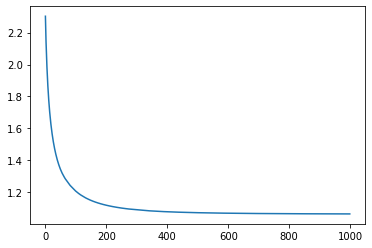

In [75]:
plt.plot(l)
plt.show()

### Predykcja klas dla zbioru testowego oraz obliczenie trafności prognoz

In [117]:
wyniki = {}
y_pred = prediction(x_test)
score = success(y_pred, y_test)
print('Logistic Regression success: ', str(score) + ' %')
wyniki['Logistic Regression'] = score

Logistic Regression success:  69.36 %


# K-Nearest Neighbors


In [119]:
def most_frequent(List):
    '''Funkcja zwracająca najczęściej występującą wartość w liście'''
    return max(set(List), key = List.count)


def predict_KNN(x_train,y_train,x_test,k=5):
    """Funkcja pobierająca dane treningowe i testowe.
    Zwraca listę prognozowanych klas.
    K - liczba najbliższych sąsiadów"""

    y_pred = []

    for j in range(len(x_test)):
        macierz_odleglosci = []
        etykiety = []
        
        # Liczenie odległości pomiędzy obrazem testowym, a obrazami treningowymi
        for i in range(len(x_train)):
            odleglosc = np.sum((x_train[i] - x_test[j]) ** 2)
            macierz_odleglosci.append(odleglosc)
            
        posortowana_macierz = sorted(macierz_odleglosci)
        
        # Dodanie do listy etykiety k klas, które są najbliżej obrazu testowego
        for i in range(k):
            etykiety.append(y_train[macierz_odleglosci.index(posortowana_macierz[i])])

        # Dodanie predykcji do y_pred (najczęściej występującego elementu z najbliższych odległości)
        y_pred.append(most_frequent(etykiety))

    return y_pred

### Predykcja klas dla zbioru testowego oraz obliczenie trafności prognoz
Ze względu na dużą złożoność obliczeniową, tylko 500 przykładów jest wykorzystywanych ze zbioru treningowego

In [120]:
y_pred = predict_KNN(x_train[:500],y_train[:500],x_test,k=5)
score = success(y_pred, y_test)
print('K-NN success: ', str(score) + ' %')
wyniki['K-NN'] = score

K-NN success:  56.91 %


# Multilayer Perceptron

In [122]:
def train_and_predict_MLP(x_train,y_train,x_test):

    mlp = MLPClassifier(hidden_layer_sizes=(100,))

    mlp.fit(x_train,y_train)
    y_pred = mlp.predict(x_test)

    return y_pred

In [123]:
y_pred = train_and_predict_MLP(x_train,y_train,x_test)
score = success(y_pred, y_test)
print('MLP success: ', str(score) + ' %')
wyniki['MLP'] = score

MLP success:  77.47 %


# Decision Tree

In [124]:
def train_and_predict_tree(x_train,y_train,x_test):

    Tree = DecisionTreeClassifier()

    Tree.fit(x_train,y_train)

    return Tree.predict(x_test)

In [125]:
y_pred = train_and_predict_tree(x_train,y_train,x_test)
score = success(y_pred, y_test)
print('Decision Tree success: ', str(score) + ' %')
wyniki['Decision Tree'] = score

Decision Tree success:  60.1 %


# Naive Bayes

In [126]:
def train_and_predict_bayes(x_train,y_train,x_test):

    gnb = GaussianNB()
    gnb.fit(x_train,y_train)

    y_pred = gnb.predict(x_test)
    return y_pred

In [127]:
y_pred = train_and_predict_tree(x_train,y_train,x_test)
score = success(y_pred, y_test)
print('Naive Bayes success: ', str(score) + ' %')
wyniki['Naive Bayes'] = score

Naive Bayes success:  60.02 %


### Przedstawienie na wykresie osiągniętych wyników

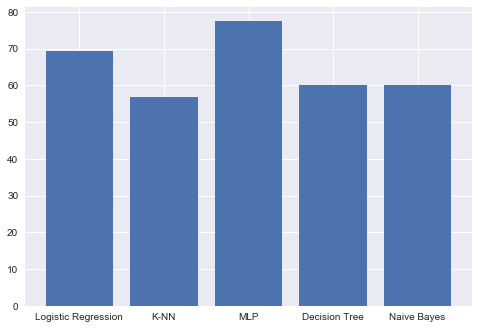

In [128]:
plt.style.use('seaborn')
plt.bar(range(len(wyniki)), list(wyniki.values()), align='center')
plt.xticks(range(len(wyniki)), list(wyniki.keys()))
plt.show()

## Wyniki
Jak możemy zauważyć, Multilayer Perceptron poradził sobie najlepiej z rozpoznawaniem obrazów. Miał on wynik na poziomie 77,47 %. Następnym w kolejności była regresja logistyczna z wynikiem 69,36 %. Na trzecim miejscu uplasował się model Decision Tree z wynikiem 60,1 %. Podobny wynik uzyskał Naive Bayes - 60,02 %. Najgorzej poradził sobie algorytm K-Nearest Neighbors, miał tylko 56,91 %